# Lecture 4: Functions

One construct that is extremely useful and provided by almost all programming languages is __functions.__

We already saw a few of them:

 - the ```sqrt()``` function from NumPy
 - the built-in ```print()``` function
 
We will now explore functions in greater detail. Let's start by making some imports.

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,5)

What does the ```%``` mean in the first line? It is a so-called **magic command** that configures how matplotlib (a popular Python plotting library) integrates with the notebook environment. 

```inline:``` This specifies that plots should be rendered inline, meaning directly within the notebook, as static images (PNG format).

**What It Does:** When you use %matplotlib inline:

- Renders Plots Inline: Any matplotlib plots created after this command will be displayed below the cell that generates them, instead of opening in a separate window.
- Improves Notebook Workflow: This is particularly useful for exploratory data analysis because you can see your plots right next to the code that generates them.

**Notes:**
- In modern Jupyter environments, this is often not required because Jupyter defaults to inline rendering. In fact, in this version of Jupyter Notebook, we would not need it. But depending on your version or IDE, you might need it.

The last line in the code snippet modifies the default size of all matplotlib plots by updating the rcParams dictionary.

**Explanation:**
```plt.rcParams:```
- rcParams stores configuration settings (or "runtime configuration parameters") for controlling the appearance of plots.
- It allows you to customize various aspects of your plots, such as font size, line styles, colors, and figure sizes.

```figure.figsize:```
- This specific key, ```figure.figsize```, controls the default size of a figure in inches.
- By setting this value, you define the dimensions of all subsequent plots unless explicitly overridden.
 
```(8, 5):```
- This tuple specifies the default figure width and height in inches.
- In this case, the figure will be 8 inches wide and 5 inches tall.
- depending on your screen, you might want to adjust it

## Function Basics
A function is a named section of a program that implements a specific task.

Many functions exist already and we can use them off the shelf.

So, let's see how we can use these functions and then we discuss how we can build our own functions.

### Built-in Functions
Python has a number of _built-in_ functions that are available without any import.

In [4]:
max(19,20)

20

In [6]:
print('Austin')

Austin


In [8]:
str(22)

'22'

In [10]:
type(22)

int

In [12]:
type(str(22))

str

In [14]:
bools = False, True, True
all(bools)

False

In [16]:
any(bools)

True

The full list of built-in functions is [here](https://docs.python.org/3/library/functions.html).

### Third Party Functions
If the built-in functions do not cover what we need, we have to either import other functios or create our own. 
We already saw many examples of imported functions. There are __a lot__ of functions out there that can be imported. Here is just one example:

In [18]:
import calendar
calendar.isleap(2020)

True

There are many very powerful packages out there with many functions. For example, it is pretty straightforward to run a regression (we will cover this in more detail in a later lecture):

In [20]:
import statsmodels.api as sm

# Generate random data
np.random.seed(78712)  # Set seed for reproducibility
N = 100 # sample size
x = np.random.rand(N)  # Independent variable
y = 2 * x + np.random.randn(N)*0.2   # Dependent variable with some noise

# Add a constant term for the intercept
x_with_constant = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x_with_constant)
results = model.fit()

# Print the summary of regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     689.6
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           3.84e-46
Time:                        10:11:25   Log-Likelihood:                 11.946
No. Observations:                 100   AIC:                            -19.89
Df Residuals:                      98   BIC:                            -14.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0442      0.043      1.017      0.3

We could also do this without the ```sm.OLS``` function, but this is usually more cumbersome, more prone to error and less efficient. 

For this, remember from your econometrics class that

$$\hat{\beta}_{OLS} = (X'X)^{-1}(X'y)$$

In [22]:
xt_x_inv = np.linalg.inv(x_with_constant.T @ x_with_constant)
xt_y = x_with_constant.T @ y
xt_x_inv @ xt_y

array([0.04424996, 1.92771394])

## Defining our own functions
Let's start with a relatively simple Python function that implements the mathematical function $f(x) = 2x + 1$

In [24]:
def f(x):
    return 2 * x + 1

We can now call this function:

In [27]:
f(1)

3

In [29]:
f(10)

21

We can also write longer functions, for example, one that computes the absolute value of a given number (such a function would already be built-in, but let's still write our own to get some practice).

In [36]:
def new_abs_function(x):
    if x < 0:
        abs_value = -x
    else:
        abs_value = x
    
    return abs_value

In [38]:
print(new_abs_function(3))
print(new_abs_function(-3))

3
3


Let's review what the function does:

 - ```def``` is a Python keyword used to start function definitions
 - ```def new_abs_function(x):``` indicates that the function is called ```new_abs_function``` and that it has a single argument ```x``` (don't forget the `:`)
 - The indented code is a code block called the _function body_
 - The ```return``` keyword indicates that ```abs_value``` is the object that should be returned to the calling code.
 
This whole function definition is read by the Python interpreter and stored in memory.

A function may have arbitrarily many ```return``` statements (including zero).

Execution of the function terminates when the first return ist hit, allowing code like the following example

In [42]:
def f(x):
    if x < 0:
        return 'negative'
    return 'nonnegative'

In [44]:
f(3)

'nonnegative'

In [46]:
f(-3)

'negative'

To see that the function terminates with the first return, consider the following two modifications of the previous function:

In [49]:
def f2(x):
    if x < 0:
        return 'negative'
        print('test')
    return 'nonnegative'

In [51]:
f2(3)

'nonnegative'

In [53]:
f2(-3)

'negative'

In [55]:
def f3(x):
    if x < 0:
        return 'negative'
    print('test')
    return 'nonnegative'

In [57]:
f3(3)

test


'nonnegative'

In [59]:
f3(-3)

'negative'

### Exercise (to do in class):
Write a function that returns the absolute value of a given number with the same syntax style as here:
```python
def f(x):
    if x < 0:
        return 'negative'
    return 'nonnegative'
```

In [68]:
def f(x):
    if x<0:
        return -x
    return x


In [70]:
f(10)


10

In [72]:
f(-10)

10

### Keyword Arguments
In Lecture 2, when we discussed different ways of simulating and plotting a white noise process, we came across the statement
```python
plt.plot(x, 'b-', label = 'white noise')
```
In this call to Matplotlib's ```plot``` function, notice that the last argument is passed in ```name = argument``` syntax.

This is called a _keyword argument_, with ```label``` being the keyword.

Non-keyword arguments are called _positional arguments_, since their meaning is determined by order

 - ```plot(x,'b', label = "white noise")``` is different from ```plot('b', x, label = "white noise")```

Keyword arguments are particularly useful when a function has a lot of arguments, in which case it is hard to remember the right order.

You can adopt keyword arguments in your own functions easily, as the next example illustrates.

In [75]:
def f(x, a=1, b=2):
    return a + b*x

The keyword argument values we supplied in the definition of ```f``` become the default values.

In [78]:
f(2)

5

But they can be modified as follows (here the keywords are `a` and `b`).

In [81]:
f(2, a = 4, b=5)

14

Note, when we specify the keyword explicitly, we can also change the order (if we do not specify the keywords explicitly, we have to remember the order).

In [84]:
f(2, b = 5, a = 4)

14

In [86]:
f(2, 5, 4)

13

We see that we do not get the same answer, because the default order is not the same as specified here `f(2, b = 5, a = 4)`.

We can also only provide one specific value and leave the rest to the function's default:

In [89]:
f(2, a = 3) # here, b is set to its default value of 2

7

### The Flexibility of Python Functions
Python functions are very flexible. In particular,

 - any number of functions can be defined in a given file
 - functions can be (and often are) defined inside other functions
 - any object can be passed to a function as an argument, including other functions
 - a function can return any kind of object, including functions
 

## One-Line Functions: ```lambda```
The ```lambda```keyword is used to create simple functions on one line.
For example, the definitions
```python
def f(x):
    return x**3
```
and 
```python
f = lambda x: x**3
```
are entirely equivalent.

```lambda``` can be very useful. For example, suppose we want to calculate $\int_0^2 x^3 dx$ using Python.

The SciPy library has a function called ```quad``` that will do the integration for us. The syntax of the `quad` function is `quad(f, a, b)` where `f` is a function and `a` and `b` are numbers (the integral bounds or limits of integration). To create the function $f(x) = x^3$, we can use `lambda` as follows:

In [94]:
from scipy.integrate import quad

value, error = quad(lambda x: x**3, 0,2)
value

4.0

First defining the `f` function is also possible but makes the code more cluttered:

In [97]:
def f(x):
    return x**3

value, error = quad(f, 0, 2)
value

4.0

The functions that we create by `lambda` are said to be _anonymous_ because we never gave them a name.

### Why write functions?
User-defined functions are important for improving the clarity of your code by

 - separating different strands of logic
 - facilitating code reuse

## Applications
Recall the code from lecture 2:

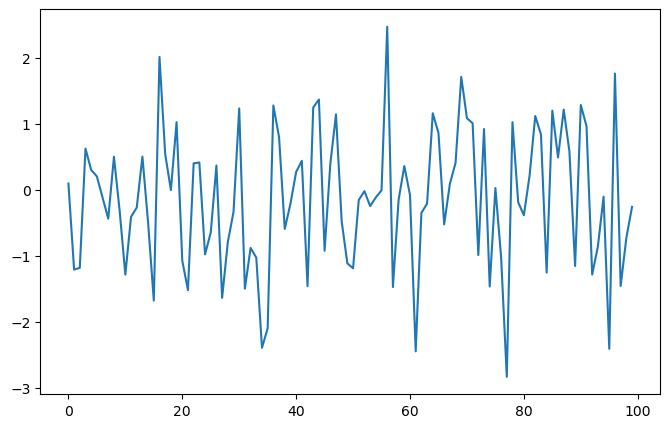

In [102]:
ts_length = 100
ϵ_values = [] # creates an empty list

for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)
    
plt.plot(ϵ_values)
plt.show()

We will now break this program into two parts:

 1. a user-defined function that generates a list of random variables
 2. the main part of the program that
     1. calls this function to get data
     2. plots the data
     
This is accomplished in the next program.

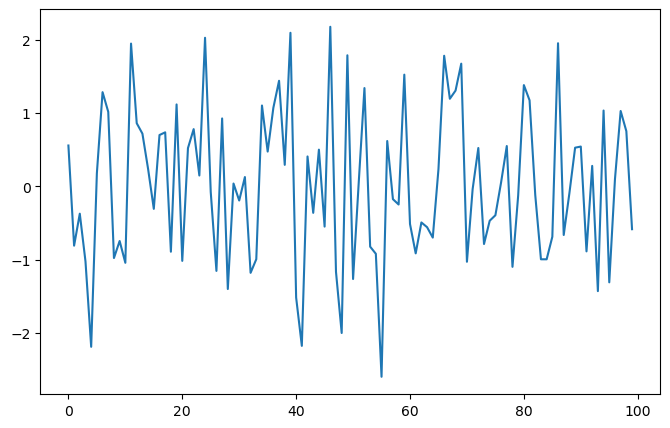

In [105]:
def generate_data(n):
    ϵ_values = []
    for i in range(n):
        e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100)
plt.plot(data)
plt.show()

Let's extend this a little bit by drawing independent normals with mean $\mu$ and standard deviation $\sigma$ (above we draw from the standard normal, i.e., $\mu = 0$ and $\sigma = 1$).

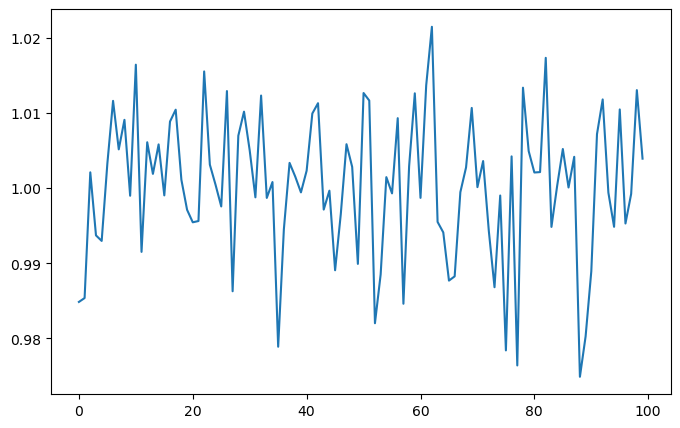

In [108]:
def generate_data_new(n, μ = 0, σ = 1): # setting these defaults implies that we draw from a standard normal if not specified otherwise
    ϵ_values = []
    for i in range(n):
        e = μ + σ * np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data_new(100, μ = 1, σ = 0.01)
plt.plot(data)
plt.show()

### Adding conditions
So far, our function `generate_data()` is rather limited. We already saw how we can make it a bit more general by specifying its mean and standard deviation.

We can also add conditions. For example, we can give the function the ability to return either the standard normals or uniform random variables on $(0,1)$ as required.

The following program shows how we can do this.

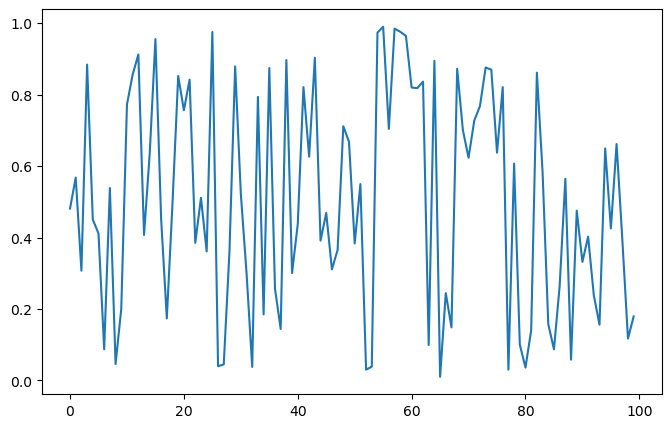

In [111]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        if generator_type == 'U':
            e = np.random.uniform(0,1)
        else:
            e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100,'U')
plt.plot(data)
plt.show()

Some notes on the previous program:

 - we are passing the argument `U` as a string, which is why we write it as `'U'`.
 - Notice that equality is tested with the `==` syntax, not `=`
   
     - for example, the statement `a = 10` assigns the name `a` to the value `10`
     - the expression `a == 10` evaluates to either `True` or `False`, depending on the value of `a`.
     
Now, there are several ways how we can simplify the code above.

For example, we can get rid of the conditionals all together by just passing the desired generator type _as a function_.

To understand this, consider the following program.

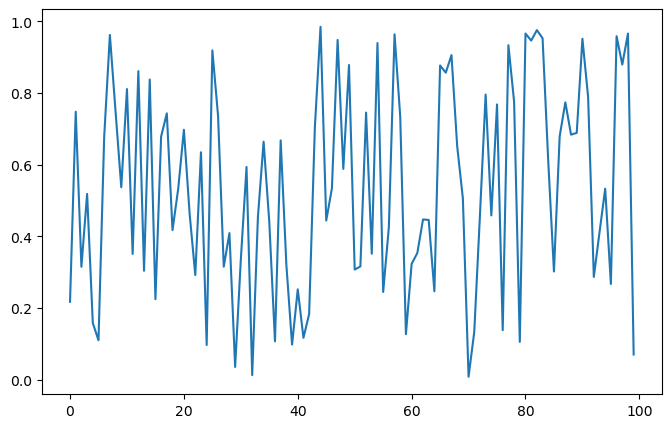

In [114]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        e = generator_type()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, np.random.uniform)
plt.plot(data)
plt.show()

Now, when we call the function `generate_data()`, we pass `np.random.uniform` as the second argument.
This object is a _function_.

Note, that the way we wrote the function, there is no default value for `generator_type`. So, if we do not specify it, we get an error message.

When the function call `generate_data(100, np.random.uniform)` is executed, Python runs the function code block with `n` equal to 100 and the name `generator_type` "bound" to the function `np.random.uniform`.

 - while these lines are executed, the names `generator_type` and `np.random.uniform` are synonyms, and can be used in identical ways.
 
This principle works more generally:

In [117]:
max(7,4,2)

7

In [119]:
m = max
m(7,4,2)

7

Here, we created another name for the built-in function `max`, which could then be used in identical ways. 

### Exercise (to do in class):
Write a function that draws either from the normal or uniform distribution as above, but where we can specify the mean and variance in case of the normal distribution, or the upper and lower bounds in case of the uniform distribution, i.e., we draw from $N(\mu, \sigma)$ or $U(a,b)$, respectively. Set the default to: $\mu = 0, \sigma = 1, a = 0, b = 1$.

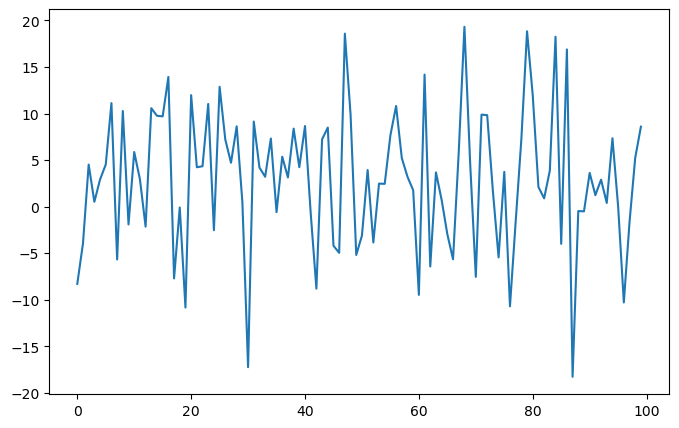

In [11]:
# Solution:
def generate_data(n, generator_type, μ = 0, σ = 1, a = 0, b =1):
    ϵ_values = []
    for i in range(n):
        if generator_type == 'U':
            e = np.random.uniform(a,b)
        if generator_type == 'N':
            e = μ + σ*np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, 'N',μ = 2, σ = 8)
plt.plot(data)
plt.show()    

## Recursive Function Calls
A recursive function is a function that calls itself. For example, consider
$$x_{t+1} = 2x_t, \quad x_0 = 1$$
The answer is $2^t$. We can compute this easily with a loop.

In [128]:
def x_loop(t):
    x = 1
    for i in range(t):
        x = 2*x
    return x

Or we can write a recursive solution:

In [131]:
def x(t):
    if t == 0:
        return 1
    else:
        return 2*x(t-1)

What happens here is that each successive call uses its own _frame in the stack_:

 - a _frame_ is where the local variables of a given function call are held
 - _stack_ is memory used to process function calls
     - a [First In Last Out (FILO)](https://en.wikipedia.org/wiki/FIFO_(computing_and_electronics)) queue

In [134]:
x_loop(10)

1024

In [136]:
x(10)

1024

In [141]:
type(x)

function